In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver
import ipywidgets as widgets  # interactive display


In [2]:
# @title Plotting Functions
def plot_trajectory(system, params, initial_condition, dt=0.1, T=6,
                    figtitle=None):

    """
    Shows the solution of a linear system with two variables in 3 plots.
    The first plot shows x1 over time. The second plot shows x2 over time.
    The third plot shows x1 and x2 in a phase portrait.
  
    Args:
      system (function): a function f(x) that computes a derivative from
                          inputs (t, [x1, x2], *params)
      params (list or tuple): list of parameters for function "system"
      initial_condition (list or array): initial condition x0
      dt (float): time step of simulation
      T (float): end time of simulation
      figtitlte (string): title for the figure
  
    Returns:
      nothing, but it shows a figure
    """

    # time points for which we want to evaluate solutions
    t = np.arange(0, T, dt)

    # Integrate
    # use built-in ode solver
    solution = solve_ivp(system,
                         t_span=(0, T),
                         y0=initial_condition, t_eval=t,
                         args=(params),
                         dense_output=True)
    x = solution.y

    # make a color map to visualize time
    timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

    # make a large figure
    fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
    fig.set_size_inches(10, 3)

    # plot x1 as a function of time
    ah1.scatter(t, x[0,], color=timecolors)
    ah1.set_xlabel('time')
    ah1.set_ylabel('x1', labelpad=-5)

    # plot x2 as a function of time
    ah2.scatter(t, x[1], color=timecolors)
    ah2.set_xlabel('time')
    ah2.set_ylabel('x2', labelpad=-5)

    # plot x1 and x2 in a phase portrait
    ah3.scatter(x[0,], x[1,], color=timecolors)
    ah3.set_xlabel('x1')
    ah3.set_ylabel('x2', labelpad=-5)
    #include initial condition is a blue cross
    ah3.plot(x[0,0], x[1,0], 'bx')

    # adjust spacing between subplots
    plt.subplots_adjust(wspace=0.5)

    # add figure title
    if figtitle is not None:
        fig.suptitle(figtitle, size=16)
    plt.show()


def plot_streamplot(A, ax, figtitle=None, show=True):
    """
    Show a stream plot for a linear ordinary differential equation with
    state vector x=[x1,x2] in axis ax.
  
    Args:
      A (numpy array): 2x2 matrix specifying the dynamical system
      ax (matplotlib.axes): axis to plot
      figtitle (string): title for the figure
      show (boolean): enable plt.show()
  
    Returns:
      nothing, but shows a figure
    """

    # sample 20 x 20 grid uniformly to get x1 and x2
    grid = np.arange(-20, 21, 1)
    x1, x2 = np.meshgrid(grid, grid)

    # calculate x1dot and x2dot at each grid point
    x1dot = A[0,0] * x1 + A[0,1] * x2
    x2dot = A[1,0] * x1 + A[1,1] * x2

    # make a colormap
    magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
    color = 2 * np.log1p(magnitude) #Avoid taking log of zero

    # plot
    plt.sca(ax)
    plt.streamplot(x1, x2, x1dot, x2dot, color=color,
                   linewidth=1, cmap=plt.cm.cividis,
                   density=2, arrowstyle='->', arrowsize=1.5)
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')

    # figure title
    if figtitle is not None:
        plt.title(figtitle, size=16)

    # include eigenvectors
    if True:
        # get eigenvalues and eigenvectors of A
        lam, v = np.linalg.eig(A)

        # get eigenvectors of A
        eigenvector1 = v[:,0].real
        eigenvector2 = v[:,1].real

        # plot eigenvectors
        plt.arrow(0, 0, 20*eigenvector1[0], 20*eigenvector1[1],
                  width=0.5, color='r', head_width=2,
                  length_includes_head=True)
        plt.arrow(0, 0, 20*eigenvector2[0], 20*eigenvector2[1],
                  width=0.5, color='b', head_width=2,
                  length_includes_head=True)
    if show:
        plt.show()


def plot_specific_example_stream_plots(A_options):
    """
    Show a stream plot for each A in A_options
  
    Args:
      A (list): a list of numpy arrays (each element is A)
  
    Returns:
      nothing, but shows a figure
    """
    # get stream plots for the four different systems
    plt.figure(figsize=(10, 10))

    for i, A in enumerate(A_options):

        ax = plt.subplot(2, 2, 1+i)
        # get eigenvalues and eigenvectors
        lam, v = np.linalg.eig(A)

        # plot eigenvalues as title
        # (two spaces looks better than one)
        eigstr = ",  ".join([f"{x:.2f}" for x in lam])
        figtitle =f"A with eigenvalues\n"+ '[' + eigstr + ']'
        plot_streamplot(A, ax, figtitle=figtitle, show=False)

        # Remove y_labels on righthand plots
        if i % 2:
            ax.set_ylabel(None)
        if i < 2:
            ax.set_xlabel(None)

        plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

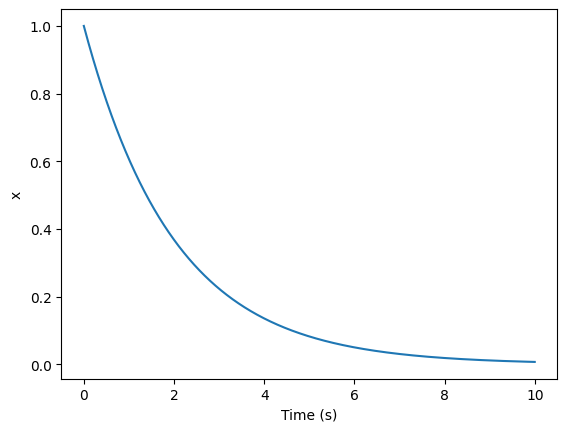

In [3]:
def integrate_exponential(a, x0, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros_like(t, dtype=complex)
    x[0] = x0
    for i in range(1, len(t)):
        prev_x = x[i-1]
        xdot = a * prev_x # linear change 
        x[i] = prev_x + xdot * dt # euler forward pass
    return x, t

# Choose parameters
a = -0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x0 = 1.     # initial condition of x at time 0

# Use Euler's method
x, t = integrate_exponential(a, x0, dt, T)

# Visualize
plt.plot(t, x.real)
plt.xlabel('Time (s)')
plt.ylabel('x')
plt.show()

In [4]:
@widgets.interact(a = widgets.FloatSlider(value = 0.5, min = -2.5, max = 1.5), dt = widgets.FloatSlider(value = 0.001, min = 0.001, max = 1.0))
def plot(a, dt):
    T = 10      # total Time duration
    x0 = 1.     # initial condition of x at time 0 
    # Use Euler's method
    x, t = integrate_exponential(a, x0, dt, T)

    # Visualize
    plt.plot(t, x.real)
    plt.xlabel('Time (s)')
    plt.ylabel('x')
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='a', max=1.5, min=-2.5), FloatSlider(value=0.001, des…

In [5]:
@widgets.interact
def plot_complex(real = (-2, 2, .2), imaginary = (-4, 7, .1)):
    T = 5
    dt = 0.0001
    x0 = 1.
    a = complex(real, imaginary)
    x, t = integrate_exponential(a, x0, dt, T)
    plt.plot(t, x.real)
    plt.xlabel('Time (s)')
    plt.ylabel('x')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='real', max=2.0, min=-2.0, step=0.2), FloatSlider(val…

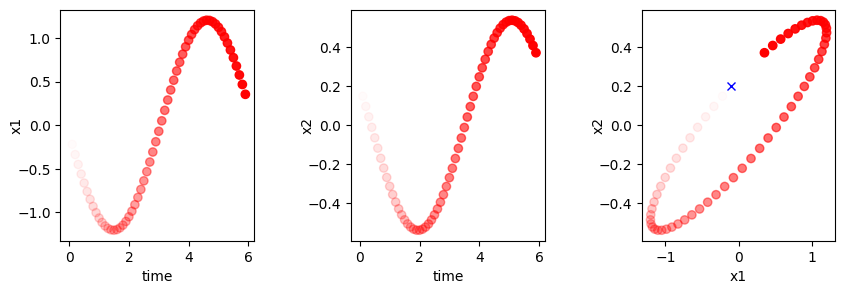

In [6]:
def system(t, x, a00, a01, a10, a11):
    '''
    Compute the derivative of the state x at time t for a linear
    differential equation with A matrix [[a00, a01], [a10, a11]].
  
    Args:
      t (float): time
      x (ndarray): state variable
      a00, a01, a10, a11 (float): parameters of the system
  
    Returns:
      ndarray: derivative xdot of state variable x at time t
    '''

    # compute x1dot and x2dot
    x1dot = a00 * x[0] + a01 * x[1] 
    x2dot = a10 * x[0] + a11 * x[1]

    return np.array([x1dot, x2dot])


# Set parameters
T = 6 # total time duration
dt = 0.1 # timestep of our simulation
A = np.array([[2, -5],
              [1, -2]])
x0 = [-0.1, 0.2]

# Simulate and plot trajectories
plot_trajectory(system, [A[0, 0], A[0, 1], A[1, 0], A[1, 1]], x0, dt=dt, T=T)

In [7]:
T = 6  # total Time duration
dt = 0.1  # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])  # initial condition of x at time 0

A_option_1 = [[2, -5],[1, -2]]
A_option_2 = [[3,4], [1, 2]]
A_option_3 = [[-1, -1], [0, -0.25]]
A_option_4 = [[3, -2],[2, -2]]

@widgets.interact
def plot_euler_integration(A=widgets.Dropdown(options=[A_option_1,
                                                       A_option_2,
                                                       A_option_3,
                                                       A_option_4,
                                                       None],
                                              value=A_option_1)):
    if A:
        plot_trajectory(system, [A[0][0],A[0][1],A[1][0],A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='A', options=([[2, -5], [1, -2]], [[3, 4], [1, 2]], [[-1, -1], [0, …

In [8]:
T = 6  # total Time duration
dt = 0.1  # timestep of our simulation
x0 = np.asarray([-0.1, 0.2])  # initial condition of x at time 0
A = [[2, -5],[1, -2]]

x0_option_1 = [-.1, 0.2]
x0_option_2 = [10, 10]
x0_option_3 = [-4, 3]

@widgets.interact
def plot_euler_integration(x0 = widgets.Dropdown(options=[x0_option_1,
                                                          x0_option_2,
                                                          x0_option_3,
                                                          None],
                                                 value=x0_option_1)):
    if x0:
        plot_trajectory(system, [A[0][0], A[0][1], A[1][0], A[1][1]], x0, dt=dt, T=T)

interactive(children=(Dropdown(description='x0', options=([-0.1, 0.2], [10, 10], [-4, 3], None), value=[-0.1, …

## Markov Processes

In [9]:
def plot_switch_simulation(t, x):
    plt.figure()
    plt.plot(t, x)
    plt.title('State-switch simulation')
    plt.xlabel('Time')
    plt.xlim((0, 300)) # zoom in time
    plt.ylabel('State of ion channel 0/1', labelpad=-60)
    plt.yticks([0, 1], ['Closed (0)', 'Open (1)'])
    plt.show()


def plot_interswitch_interval_histogram(inter_switch_intervals):
    plt.figure()
    plt.hist(inter_switch_intervals)
    plt.title('Inter-switch Intervals Distribution')
    plt.ylabel('Interval Count')
    plt.xlabel('time')
    plt.show()


def plot_state_probabilities(time, states):
    plt.figure()
    plt.plot(time, states[:, 0], label='Closed')
    plt.plot(time, states[:, 1], label='Open')
    plt.xlabel('time')
    plt.ylabel('prob(open OR closed)')
    plt.legend()
    plt.show()

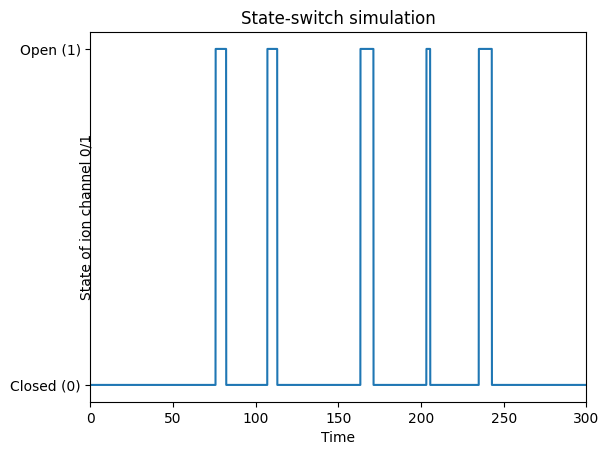

In [10]:
# parameters
T = 5000     # total Time duration
dt = 0.001   # timestep of our simulation

# simulate state of our ion channel in time
# the two parameters that govern transitions are
# c2o: closed to open rate
# o2c: open to closed rate
def ion_channel_opening(c2o, o2c, T, dt):
    # initialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    switch_times = []

    # assume we always start in Closed state
    x[0] = 0

    # generate a bunch of random uniformly distributed numbers
    # between zero and unity: [0, 1),
    # one for each dt in our simulation.
    # we will use these random numbers to model the
    # closed/open transitions
    myrand = np.random.random_sample(size=len(t))


    # walk through time steps of the simulation
    for k in range(len(t)-1):
        # switching between closed/open states are
        # Poisson processes
        if x[k] == 0 and myrand[k] < c2o*dt: # remember to scale by dt!
            x[k+1:] = 1
            switch_times.append(k*dt)
        elif x[k] == 1 and myrand[k] < o2c*dt:
            x[k+1:] = 0
            switch_times.append(k*dt)

    return t, x, switch_times


c2o = 0.02
o2c = 0.1
np.random.seed(0) # set random seed
t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)
plot_switch_simulation(t, x)


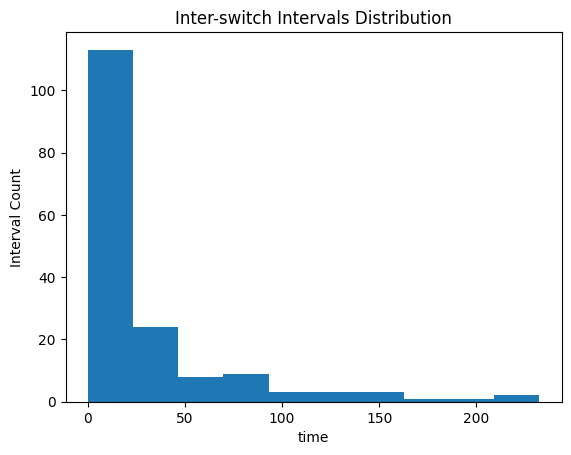

In [11]:
inter_switch_intervals = np.diff(switch_times) 

# plot inter-switch intervals
plot_interswitch_interval_histogram(inter_switch_intervals)

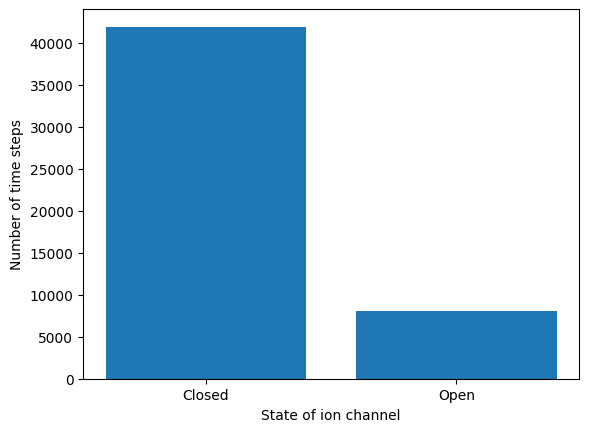

In [12]:
states = ['Closed', 'Open']
(unique, counts) = np.unique(x, return_counts=True)

plt.figure()
plt.bar(states, counts)
plt.ylabel('Number of time steps')
plt.xlabel('State of ion channel')
plt.show()

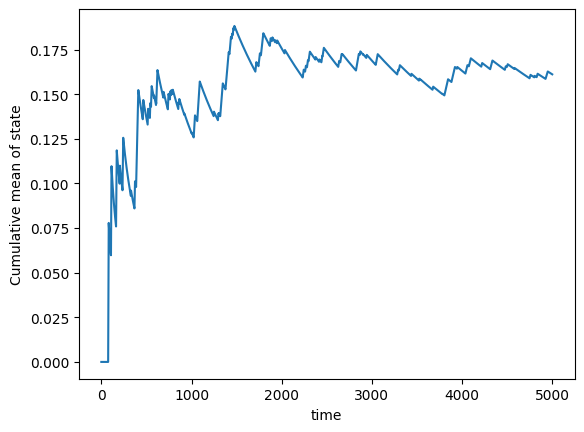

In [13]:
plt.figure()
plt.plot(t, np.cumsum(x) / np.arange(1, len(t)+1))
plt.xlabel('time')
plt.ylabel('Cumulative mean of state')
plt.show()

In [14]:
@widgets.interact
def plot_inter_switch_intervals(c2o=(0,1, .01), o2c=(0, 1, .01),
                                T=(1000, 10000, 1000)):

    t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)

    inter_switch_intervals = np.diff(switch_times)
    states = ['Closed', 'Open']
    (unique, counts) = np.unique(x, return_counts=True)

    plt.figure()
    plt.bar(states, counts)
    plt.ylabel('Number of time steps')
    plt.xlabel('State of ion channel')
    plt.show()
    
    plt.figure()
    # plot inter-switch intervals
    plt.hist(inter_switch_intervals)
    plt.title('Inter-switch Intervals Distribution')
    plt.ylabel('Interval Count')
    plt.xlabel('time')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='c2o', max=1.0, step=0.01), FloatSlider(value=0.0, de…

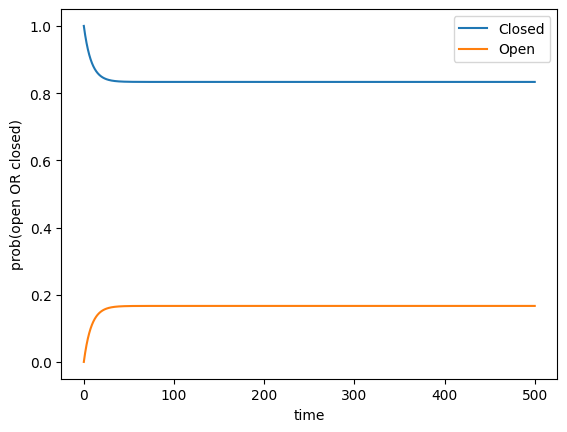

In [15]:
def simulate_prob_prop(A, x0, dt, T):
    """ Simulate the propagation of probabilities given the transition matrix A,
    with initial state x0, for a duration of T at timestep dt.
  
    Args:
      A (ndarray): state transition matrix
      x0 (ndarray): state probabilities at time 0
      dt (scalar): timestep of the simulation
      T (scalar): total duration of the simulation
  
    Returns:
      ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
    """

    # Initialize variables
    t = np.arange(0, T, dt)
    x = x0 # x at time t_0

    # Step through the system in time
    for k in range(len(t)-1):
        ## hint: use np.dot(a, b) function to compute the dot product
        ##       of the transition matrix A and the last state in x
        ## hint 2: use np.vstack to append the latest state to x
        ###################################################################

        # Compute the state of x at time k+1
        x_kp1 = A @ x[-1,:] 

        # Stack (append) this new state onto x to keep track of x through time steps
        x = np.vstack((x, x_kp1))

    return x, t


# Set parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation

# same parameters as above
# c: closed rate
# o: open rate
c = 0.02
o = 0.1
A = np.array([[1 - c*dt, o*dt],
              [c*dt,     1 - o*dt]])

# Initial condition: start as Closed
x0 = np.array([[1, 0]])

# Simulate probabilities propagation
x, t = simulate_prob_prop(A, x0, dt, T)

# Visualize
plot_state_probabilities(t, x)

In [16]:
def plot_random_walk_sims(sims, nsims=10):
    """Helper for exercise 3A"""
    plt.figure()
    plt.plot(sim[:nsims, :].T)
    plt.xlabel('time')
    plt.ylabel('position x')
    plt.show()


def plot_mean_var_by_timestep(mu, var):
    """Helper function for exercise 3A.2"""
    fig, (ah1, ah2) = plt.subplots(2)

    # plot mean of distribution as a function of time
    ah1.plot(mu)
    ah1.set(ylabel='mean')
    ah1.set_ylim([-5, 5])

    # plot variance of distribution as a function of time
    ah2.plot(var)
    ah2.set(xlabel='time')
    ah2.set(ylabel='variance')

    plt.show()


def plot_ddm(t, x, xinfty, lam, x0):
    plt.figure()
    plt.plot(t, xinfty * (1 - lam**t) + x0 * lam**t, 'r',
             label='deterministic solution')
    plt.plot(t, x, 'k.', label='simulation')  # simulated data pts
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.show()


def var_comparison_plot(empirical, analytical):
    plt.figure()
    plt.plot(empirical, analytical, '.', markersize=15)
    plt.xlabel('empirical equilibrium variance')
    plt.ylabel('analytic equilibrium variance')
    plt.plot(np.arange(8), np.arange(8), 'k', label='45 deg line')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_dynamics(x, t, lam, xinfty=0):
    """ Plot the dynamics """
    plt.figure()
    plt.title('$\lambda=%0.1f$' % lam, fontsize=16)
    x0 = x[0]
    plt.plot(t, xinfty + (x0 - xinfty) * lam**t, 'r', label='analytic solution')
    plt.plot(t, x, 'k.', label='simulation')  # simulated data pts
    plt.ylim(0, x0+1)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.show()

## Combining Determinism and Stochasticity

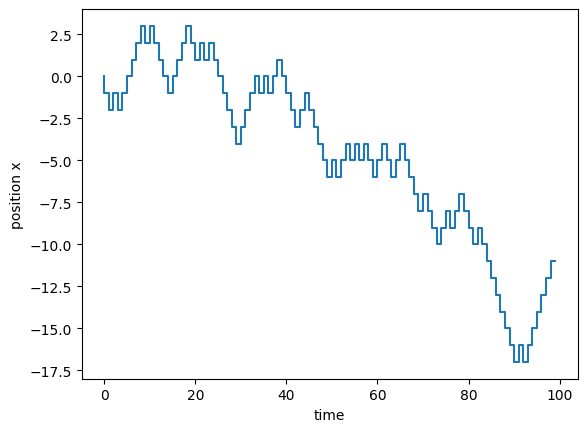

In [17]:
T = 100
t = np.arange(T)
x = np.zeros_like(t)
np.random.seed(2020) # set random seed

# initial position
x[0] = 0

# step forward in time
for k in range(len(t)-1):
    # choose randomly between -1 and 1 (coin flip)
    this_step = np.random.choice([-1,1])

    # make the step
    x[k+1] = x[k] + this_step

# plot this trajectory
plt.figure()
plt.step(t, x)
plt.xlabel('time')
plt.ylabel('position x')
plt.show()

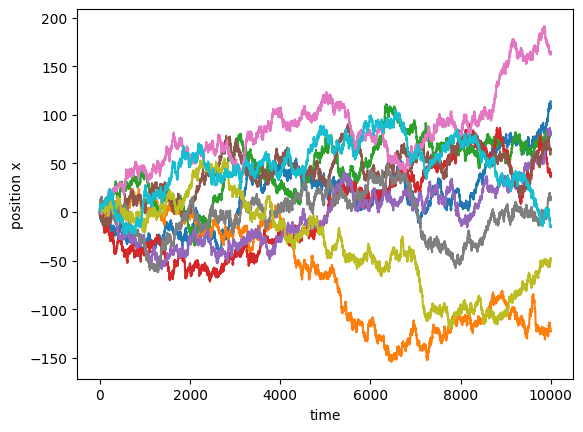

In [18]:
def random_walk_simulator(N, T, mu=0, sigma=1):
    '''Simulate N random walks for T time points. At each time point, the step
        is drawn from a Gaussian distribution with mean mu and standard deviation
        sigma.
  
    Args:
      T (integer) : Duration of simulation in time steps
      N (integer) : Number of random walks
      mu (float) : mean of step distribution
      sigma (float) : standard deviation of step distribution
  
    Returns:
      (numpy array) : NxT array in which each row corresponds to trajectory
    '''

    # generate all the random steps for all steps in all simulations in one go
    # produces a N x T array
    steps = np.random.normal(mu, sigma, size=(N, T))

    # compute the cumulative sum of all the steps over the time axis
    sim = np.cumsum(steps, axis=1)

    return sim


np.random.seed(2020) # set random seed

# simulate 1000 random walks for 10000 time steps
sim = random_walk_simulator(1000, 10000,  mu=0, sigma=1)

# take a peek at the first 10 simulations
plot_random_walk_sims(sim, nsims=10)

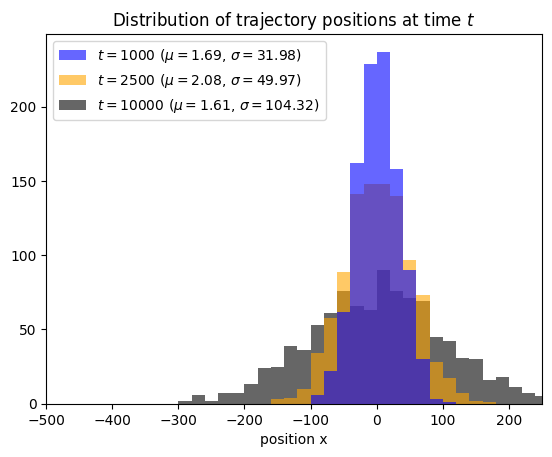

In [19]:
fig = plt.figure()
# look at the distribution of positions at different times
for i, t in enumerate([1000, 2500, 10000]):

    # get mean and standard deviation of distribution at time t
    mu = sim[:, t-1].mean()
    sig2 = sim[:, t-1].std()

    # make a plot label
    mytitle = '$t=${time:d} ($\mu=${mu:.2f}, $\sigma=${var:.2f})'

    # plot histogram
    plt.hist(sim[:,t-1],
             color=['blue','orange','black'][i],
             # make sure the histograms have the same bins!
             bins=np.arange(-300, 300, 20),
             # make histograms a little see-through
             alpha=0.6,
             # draw second histogram behind the first one
             zorder=3-i,
             label=mytitle.format(time=t, mu=mu, var=sig2))

    plt.xlabel('position x')

    # plot range
    plt.xlim([-500, 250])

    # add legend
    plt.legend(loc=2)

# add title
plt.title(r'Distribution of trajectory positions at time $t$')
plt.show()

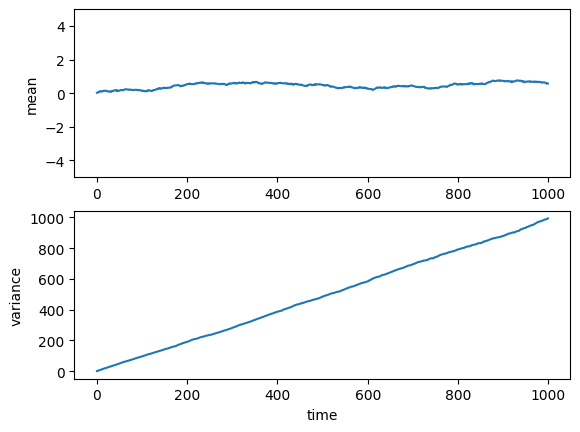

In [20]:
np.random.seed(2020) # set random seed
sim = random_walk_simulator(5000, 1000, mu=0, sigma=1)

# Compute mean
mu = np.mean(sim, axis = 0) 

# Compute variance
var = np.var(sim, axis = 0)

# Visualize
plot_mean_var_by_timestep(mu, var)

In [21]:
@widgets.interact
def plot_gaussian(mean=(-0.5, 0.5, .02), std=(.5, 10, .5)):
    sim = random_walk_simulator(5000, 1000, mu=mean, sigma=std)
    # compute the mean and variance of trajectory positions at every time point
    mu = np.mean(sim, axis=0)
    var = np.var(sim, axis=0)
    # make a figure
    fig, (ah1, ah2) = plt.subplots(2)
    # plot mean of distribution as a function of time
    ah1.plot(mu)
    ah1.set(ylabel='mean')
    # plot variance of distribution as a function of time
    ah2.plot(var)
    ah2.set(xlabel='time')
    ah2.set(ylabel='variance')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mean', max=0.5, min=-0.5, step=0.02), FloatSlider(va…

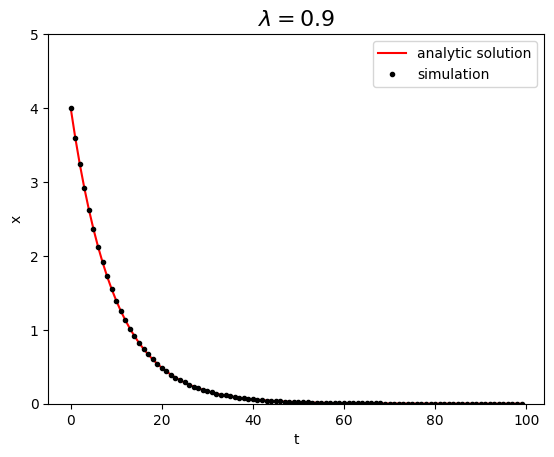

In [23]:
# parameters
lam = 0.9
T = 100  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = lam * x[k]

# plot x as it evolves in time
plot_dynamics(x, t, lam)

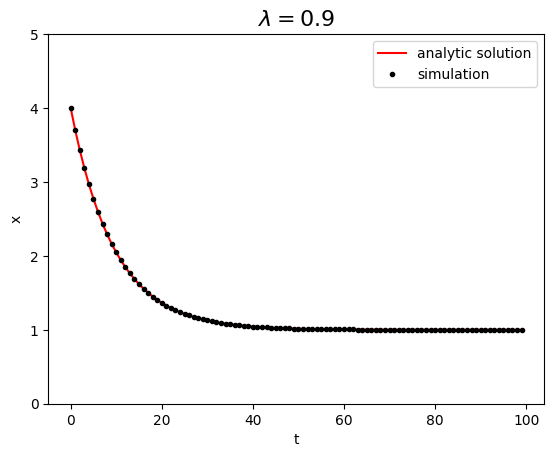

In [24]:
# parameters
lam = 0.9  # decay rate
T = 100  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = xinfty + lam * (x[k] - xinfty)

# plot x as it evolves in time
plot_dynamics(x, t, lam, xinfty)

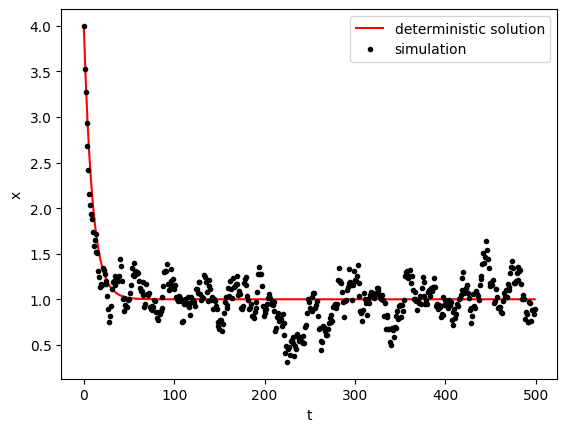

In [25]:
def simulate_ddm(lam, sig, x0, xinfty, T):
    """
    Simulate the drift-diffusion model with given parameters and initial condition.
    Args:
      lam (scalar): decay rate
      sig (scalar): standard deviation of normal distribution
      x0 (scalar): initial condition (x at time 0)
      xinfty (scalar): drift towards convergence in the limit
      T (scalar): total duration of the simulation (in steps)
  
    Returns:
      ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
    """

    # initialize variables
    t = np.arange(0, T, 1.)
    x = np.zeros_like(t)
    x[0] = x0

    # Step through in time
    for k in range(len(t)-1):
        x[k+1] = xinfty + lam * (x[k] - xinfty) + np.random.normal(0, sig) 

    return t, x


lam = 0.9  # decay rate
sig = 0.1  # standard deviation of diffusive process
T = 500  # total Time duration in steps
x0 = 4.  # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# Plot x as it evolves in time
np.random.seed(2020)
t, x = simulate_ddm(lam, sig, x0, xinfty, T)
plot_ddm(t, x, xinfty, lam, x0)

/var/folders/cq/mgwyqn7d59ngb2f13sxdkkxc0000gn/T/ipykernel_75171/3322324818.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)


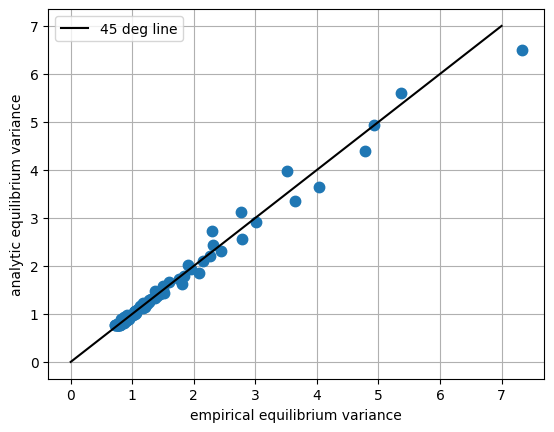

In [28]:
def ddm(T, x0, xinfty, lam, sig):
    t = np.arange(0, T, 1.)
    x = np.zeros_like(t)
    x[0] = x0

    for k in range(len(t)-1):
        x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

    return t, x


# computes equilibrium variance of ddm
# returns variance
def ddm_eq_var(T, x0, xinfty, lam, sig):
    t, x = ddm(T, x0, xinfty, lam, sig)

    # returns variance of the second half of the simulation
    # this is a hack: assumes system has settled by second half
    return x[-round(T/2):].var()


np.random.seed(2020) # set random seed

# sweep through values for lambda
lambdas = np.arange(0.05, 0.95, 0.01)
empirical_variances = np.zeros_like(lambdas)
analytical_variances = np.zeros_like(lambdas)

sig = 0.87

# compute empirical equilibrium variance
for i, lam in enumerate(lambdas):
    empirical_variances[i] = ddm_eq_var(5000, x0, xinfty, lambdas[i], sig)

# Hint: you can also do this in one line outside the loop!
analytical_variances = (sig**2 * np.ones_like(lambdas)) / (np.ones_like(lambdas) - lambdas**2) 

# Plot the empirical variance vs analytical variance
var_comparison_plot(empirical_variances, analytical_variances)